## Introduction to convnets

In [2]:
# Listing 5. Instantiating a small convnet

from keras import layers
from keras import models

model = models.Sequential()
# input shape image_heright, image_width, nchannels (does not include batch dimension)
# First argument controls the number of channels
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Output of first layer is (None, 26, 26, 32) tensot
# Feature map is 32 different filters over the input - each channel is 26x26 (the response of the filter)
# wdith x height is the satial map of the reponse
# depth is the feature (or filter)
# It is better to look at the maximal presence of different features than average presence hence max pooling
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Listing 5.2 Adding a classifier on top of the convnet

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [4]:
# Listing 5.3 Training the convnet on MNIST images

from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


(60000, 28, 28)
Epoch 1/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.1806 - acc: 0.9437
Epoch 2/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.0486 - acc: 0.9848
Epoch 3/5
60000/60000 [==============================] - 4s 58us/step - loss: 0.0328 - acc: 0.9896
Epoch 4/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0258 - acc: 0.9920
Epoch 5/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0194 - acc: 0.9941


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


10000/10000 [==============================] - 0s 41us/step


0.9916

### Modification of Dog/Cat Classifier to the Whale data

In [5]:
# Listing 5.4 Copying images to training, validation and test directories

import os, shutil
import aifc

original_train_dataset_dir = '/home/david/data/whale_data/data/train'
original_test_dataset_dir = '/home/david/data/whale_data/data/test'

# smaller dataset
base_dir = '/home/david/dev/dl_with_python/whale_small/'
os.mkdir(base_dir)

# define train, validationa and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Right and non-right whale training recording
train_right_dir = os.path.join(train_dir, 'right')
os.mkdir(train_right_dir)
train_nonright_dir = os.path.join(train_dir, 'nonright')
os.mkdir(train_nonright_dir)

# Right and non-right whale validation recordings
validation_right_dir = os.path.join(validation_dir, 'right')
os.mkdir(validation_right_dir)
validation_nonright_dir = os.path.join(validation_dir, 'nonright')
os.mkdir(validation_nonright_dir)

# Right and non-right whale training recordings
test_right_dir = os.path.join(test_dir, 'right')
os.mkdir(test_right_dir)
test_nonright_dir = os.path.join(test_dir, 'nonright')
os.mkdir(test_nonright_dir)


In [8]:
import fileio
import aifc
import audio_processor as ap

original_data_dir = '/home/david/data/whale_data/data/'
base_dir = '/home/david/dev/dl_with_python/whale_small/'

# spectrogram parameters
params = {'NFFT':64, 'Fs':2000, 'noverlap':32}
# Number of time slice metrics
maxTime = 126

# first work out which files are right/non-right and then copy smaller set to the whale_small dir

# build a train object
#train = fileio.TrainData(original_data_dir+'train.csv',base_dir+'train')

#print(train)

# this would be a list of audio files in the small training set
audio_paths = ['data/bensound-cute.mp3',
               'data/bensound-actionable.mp3',
               'data/bensound-dubstep.mp3',
               'data/bensound-thejazzpiano.mp3']
    
# prepare data
melgrams = np.zeros((0, 1, 12, 126))

for audio_path in audio_paths:
    melgram = ap.compute_melgram(audio_path)
    melgrams = np.concatenate((melgrams, melgram), axis=0)

# load a model
#model = MusicTaggerCNN(weights='msd', include_top=False)

# make a prediction
#features = model.predict(melgrams)
'''
# Copy the first 1000 whale recordings to train_whale_dir
fnames = ['train{}.aiff'.format(i) for i in range(1000) ]
for fname in fnames:
    src = os.path.join(original_train_dataset_dir, fname)
    dst = os.path.join(train_right_dir, fname)
    shutil.copyfile(src, dst)

# Copy the first 1000 whale recordings to train_whale_dir
fnames = ['train{}.aiff'.format(i) for i in range(1000, 1500) ]
for fname in fnames:
    src = os.path.join(original_train_dataset_dir, fname)
    dst = os.path.join(validation_right_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy the first 30000 whale recordings to train_whale_dir
fnames = ['test{}.aiff'.format(i) for i in range(500) ]
for fname in fnames:
    src = os.path.join(original_test_dataset_dir, fname)
    dst = os.path.join(test_right_dir, fname)
    shutil.copyfile(src, dst)
'''

"\n# Copy the first 1000 whale recordings to train_whale_dir\nfnames = ['train{}.aiff'.format(i) for i in range(1000) ]\nfor fname in fnames:\n    src = os.path.join(original_train_dataset_dir, fname)\n    dst = os.path.join(train_right_dir, fname)\n    shutil.copyfile(src, dst)\n\n# Copy the first 1000 whale recordings to train_whale_dir\nfnames = ['train{}.aiff'.format(i) for i in range(1000, 1500) ]\nfor fname in fnames:\n    src = os.path.join(original_train_dataset_dir, fname)\n    dst = os.path.join(validation_right_dir, fname)\n    shutil.copyfile(src, dst)\n    \n# Copy the first 30000 whale recordings to train_whale_dir\nfnames = ['test{}.aiff'.format(i) for i in range(500) ]\nfor fname in fnames:\n    src = os.path.join(original_test_dataset_dir, fname)\n    dst = os.path.join(test_right_dir, fname)\n    shutil.copyfile(src, dst)\n"

In [7]:
# Listing 5.5 Instantiating a small convnet for whale classification
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(24, 126, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 22, 124, 32)       320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 11, 62, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 60, 64)         18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 30, 64)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 2, 28, 128)        73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 14, 128)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1792)              0         
__________

In [13]:
# Listing 5.5b Instantiating convnet based on Choi music tagger

from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import ELU
from keras.utils.data_utils import get_file
from keras.layers import Input, Dense

# Determine proper input shape
input_shape = (96, 126, 1)

melgram_input = Input(shape=input_shape)

# Only tf dimension ordering
channel_axis = 3
freq_axis = 1
time_axis = 2

# Input block
x = BatchNormalization(axis=freq_axis, name='bn_0_freq')(melgram_input)

# Conv block 1
x = Convolution2D(64, 3, 3, border_mode='same', name='conv1')(x)
x = BatchNormalization(axis=channel_axis, mode=0, name='bn1')(x)
x = ELU()(x)
x = MaxPooling2D(pool_size=(2, 4), name='pool1')(x)

# Conv block 2
x = Convolution2D(128, 3, 3, border_mode='same', name='conv2')(x)
x = BatchNormalization(axis=channel_axis, mode=0, name='bn2')(x)
x = ELU()(x)
x = MaxPooling2D(pool_size=(2, 4), name='pool2')(x)

# Conv block 3
x = Convolution2D(128, 3, 3, border_mode='same', name='conv3')(x)
x = BatchNormalization(axis=channel_axis, mode=0, name='bn3')(x)
x = ELU()(x)
x = MaxPooling2D(pool_size=(2, 4), name='pool3')(x)

# Conv block 4
#x = Convolution2D(128, 3, 3, border_mode='same', name='conv4')(x)
#x = BatchNormalization(axis=channel_axis, mode=0, name='bn4')(x)
#x = ELU()(x)
#x = MaxPooling2D(pool_size=(3, 5), name='pool4')(x)

# Conv block 5
#x = Convolution2D(64, 3, 3, border_mode='same', name='conv5')(x)
#x = BatchNormalization(axis=channel_axis, mode=0, name='bn5')(x)
#x = ELU()(x)
#x = MaxPooling2D(pool_size=(4, 4), name='pool5')(x)

# Output
x = Flatten()(x)
x = Dense(50, activation='relu', name='hidden1')(x)
x = Dense(1, activation='sigmoid', name='output')(x)

# Create model
model = Model(melgram_input, x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 96, 126, 1)        0         
_________________________________________________________________
bn_0_freq (BatchNormalizatio (None, 96, 126, 1)        384       
_________________________________________________________________
conv1 (Conv2D)               (None, 96, 126, 64)       640       
_________________________________________________________________
bn1 (BatchNormalization)     (None, 96, 126, 64)       256       
_________________________________________________________________
elu_16 (ELU)                 (None, 96, 126, 64)       0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 48, 31, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 48, 31, 128)       73856     
__________

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", name="conv1")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(name="bn1", axis=3)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same", name="conv2")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(name="bn2", axis=3)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same", name="conv3")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `BatchNormalization` call to 

In [8]:
# Listing 5.6 Configuring the model for training
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [ ]:
# Listing 5.7 Using ImageDataGenerator to read images from directories

In [ ]:
# Listing 5.8 Fitting the model using a batch generator
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

In [ ]:
# Listing 5.9 Saving the model
model.save('whale_small_1.h5')

In [ ]:
# Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(ac) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

## 5.4.2 Visualising convnet filters

Display the visual pattern that each filter is meant to respond to.

Gradient ascent in input space: applying gradient descent to the value of the input image of a convnet so as to maximise the response of a specific filter, starting from a blank image. Resulting image is one that the filter is maximally responsive to.

In [1]:
import autoreload
%load_ext autoreload

import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
# Listing 5.32 Defining the loss tensor for filter visualisation

# Loss activation of filter 0 in the block3_conv1 of the VGG16 network, pretrained on ImageNet.

from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet', include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:,:,:,filter_index])

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [7]:
# Listing 5.33 Obtaining the gradient of the loss with regard to the input

# gradients returns list of tensors (of size 1 in this case). Return first element (which is a tensor)
grads = K.gradients(loss, model.input)[0]

In [8]:
print(loss)
print(grads)

Tensor("Mean:0", shape=(), dtype=float32)
Tensor("gradients_1/block1_conv1/convolution_grad/Conv2DBackpropInput:0", shape=(?, ?, ?, 3), dtype=float32)


In [9]:
# Listing 5.34 Gradient Normlisation Trick

# improves gradient descent process
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [10]:
# Define a keras backed to calculate the loss and grads tensor given an input image

# Listing 5.35 Fetching Numpy output values given Numpy input values
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

# Define a python loop to do stochastic gradient descent

# Listing 5.36 Loss maximisation via gradient descent

# start with a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128

step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    
    # step adjusts the input image in the direction that maximises the loss
    input_img_data += grads_value * step

In [11]:
# Listing 5.37 Utility function to convert a tensor into a valid image

# convert a tensor into a valid image
def deprocess_image(x):
    
    # normlise tensor with mean 0 and std 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    # clip to [0,1]
    x += 0.5
    x = np.clip(x, 0, 1)
    
    # convert to RGB
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [22]:
# Listing 5.38 Function to generate filter visualisations
def generate_pattern(layer_name,filter_index, size=150):
    # build a loss function that maximises activation of the nth filter of the layer under consideration
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    # normalisation trick
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads)))+1e-5)
    
    # Return loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # starting image
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])

        # step adjusts the input image in the direction that maximises the loss
        input_img_data += grads_value * step
    
    img = input_img_data[0]
    return deprocess_image(img)

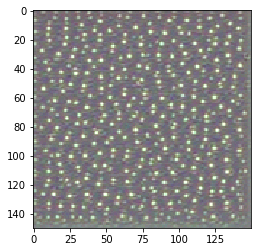

In [13]:
import matplotlib.pyplot as plt

# generate pattern for first layer and filter
plt.imshow(generate_pattern('block3_conv1', 0))

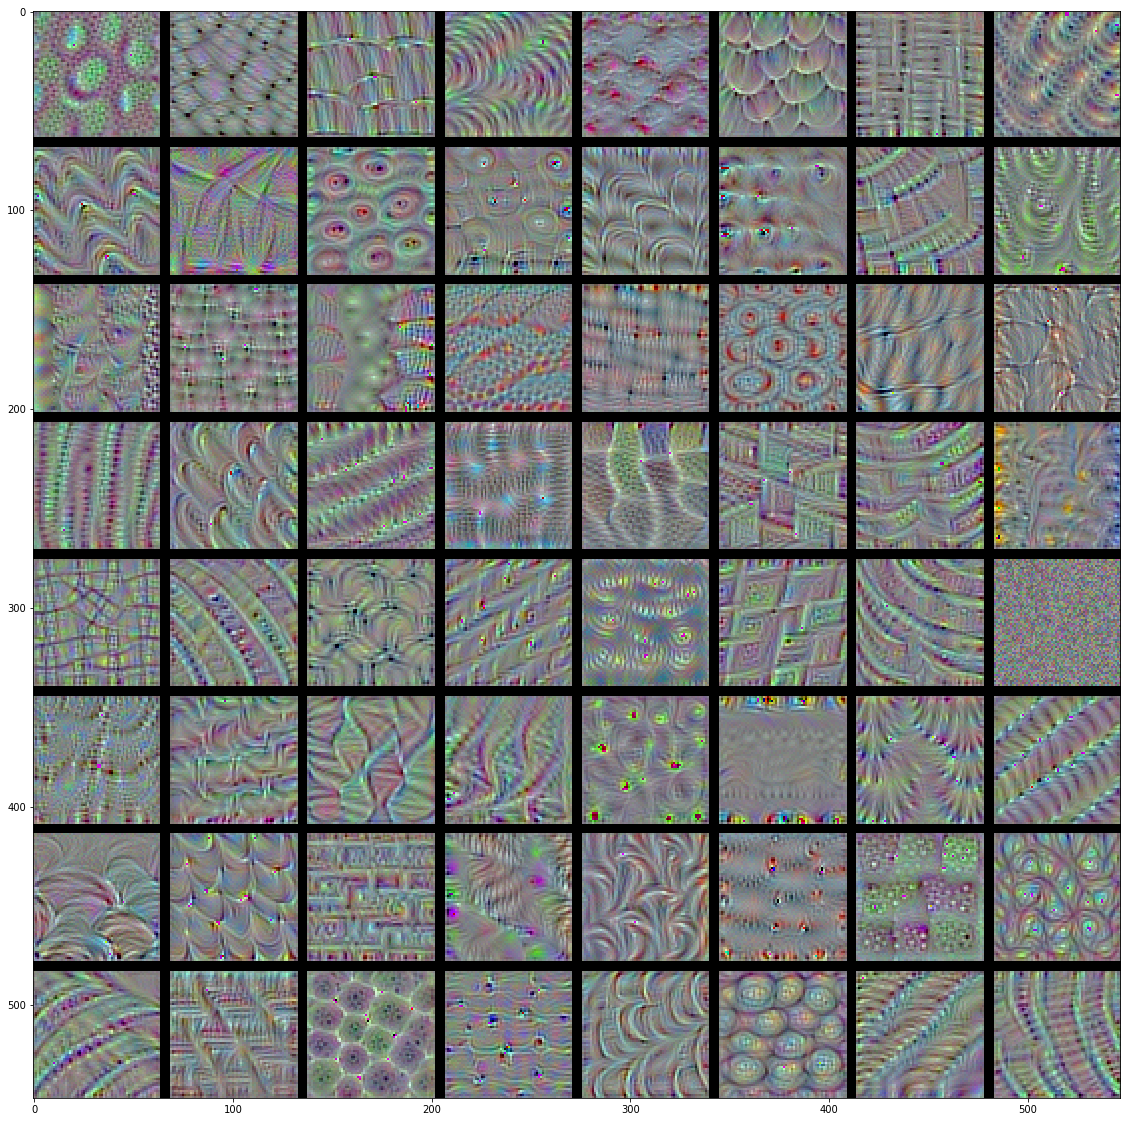

In [24]:
# Listing 5.39 Generating a grid of all filter response for first 64 filters in each layer
layer_name = 'block4_conv1'
size = 64
margin = 5

# empty image to store results
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

# iterate over rows and columns of the results grid
for i in range(8):
    for j in range(8):
        # generate pattern for filter i+(j*8) in layer_name
        filter_img = generate_pattern(layer_name, i + (j * 8), size = size)
        
        # place the pattern into square (i,j) of the results grid
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j *size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

plt.figure(figsize=(20, 20))
plt.imshow(results)

Important!
Each convnet is learning a set of filters such that the inputs to those layers can be represented as a combination of those filters. Filters get increasingly complex at deeper layers of the model.

Anaolgy: Fourier transform which decomposes a signal into a collection of consine functions.
